In [1830]:
from IPython.display import display, Math

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [1831]:
N_ = 8
# N_ = 9
n_ = 52

a_ = 0
b_ = (N_+7)/N_

n_step = 20

In [1832]:
def K_func(s, tau):
    if (0 <= s <= tau):
        return s * (2 * (N_ + 7)/N_ - tau)
    if (tau <= s <= (N_+7)/N_):
        return tau * (2 * (N_ + 7)/N_ - s)

In [ ]:
# h_step = (b_ - a_)/(n_step - 1)
# B = np.arange(a_, b_ + h_step, h_step)
# # print(f'B: {B}')

# tau_step = (b_ - a_)/(n_step - 1)
# A = np.arange(a_, b_ + tau_step, tau_step)
# # print(f'A: {A}')

h_step = (b_ - a_)/(n_step)
B = np.arange(a_ + h_step, b_+ h_step, h_step)

tau_step = (b_ - a_)/(n_step)
A = np.arange(a_ + tau_step, b_ + tau_step, tau_step)


sizeB = len(str(float(B[0])))//2
sizeA = len(str(float(A[0])))//2

str_: str = f"\\begin{{equation}}                                   " \
            f"    \\hphantom{{{sizeB}pt}} B \\hphantom{{{sizeB}pt}} " \
            f"    \\qquad                                           " \
            f"    \\hphantom{{{sizeA}pt}} A \\hphantom{{{sizeA}pt}} " \
            f"\\end{{equation}}                                     " \

display(Math(str_))
display(Math(f'$\\begin{{equation}} {sp.latex(sp.Matrix(B))} \\qquad {sp.latex(sp.Matrix(A))} \\end{{equation}}$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1834]:
NET = [[(0, 0) for _ in range(n_step)] for _ in range(n_step)]
for i in range(n_step):
    for j in range(n_step):
        NET[i][j] = (B[i], A[j])

display(Math(f'$\\begin{{equation}} B \\times A: {sp.latex(sp.Matrix(NET))} \\end{{equation}}$'))

C:\Users\HYPERPC\AppData\Local\Temp\ipykernel_12812\1903003307.py:6: SymPyDeprecationWarning: 

non-Expr objects in a Matrix is deprecated. Matrix represents
a mathematical matrix. To represent a container of non-numeric
entities, Use a list of lists, TableForm, NumPy array, or some
other data structure instead.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-non-expr-in-matrix
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  display(Math(f'$\\begin{{equation}} B \\times A: {sp.latex(sp.Matrix(NET))} \\end{{equation}}$'))


<IPython.core.display.Math object>

In [1835]:
K_ = np.zeros((n_step, n_step))
for i in range(n_step):
    for j in range(n_step):
        s_i   = NET[i][j][0]
        tau_j = NET[i][j][1]
        K_[i][j] = K_func(s_i, tau_j)

display(Math(f'$\\begin{{equation}} K^i_j: {sp.latex(sp.Matrix(K_))} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1836]:
lambda_ = 1 / (n_ - 47)

delta = lambda i, j : 1 if i == j else 0

F = np.zeros((n_step, n_step))
for i in range(n_step):
    for j in range(n_step):
        F[i][j] = delta(i, j) - lambda_ * K_[i][j] * h_step

display(Math(f'$F: {sp.latex(sp.Matrix(F))}$'))

<IPython.core.display.Math object>

In [ ]:
# y = np.array([(N_ + 3)/N_ * (s**2 + (n_ - 53)/2) for s in np.arange(a_, b_ + h_step, h_step)])
y = np.array([(N_ + 3)/N_ * (s**2 + (n_ - 53)/2) for s in np.arange(a_ + h_step, b_+ h_step, h_step)])
y_numeric = y

display(Math(f'$\\begin{{equation}} ^>y: {sp.latex(sp.Matrix(y))} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1838]:
x = np.linalg.inv(F) @ y
x_numeric = x

display(Math(f'$\\begin{{equation}} ^>x: {sp.latex(sp.Matrix(x))} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1839]:
s, tau = sp.symbols('s \\tau')
x = sp.Function('x')
C1, C2 = sp.symbols('C1 C2')

eq = sp.Eq(
        x(s) - \
        sp.Rational(1, n_ - 47) * sp.Integral(tau * (2 * sp.Rational(N_ + 7, N_) - s) * x(tau), (tau, 0, s)) - \
        sp.Rational(1, n_ - 47) * sp.Integral(s * (2 * sp.Rational(N_ + 7, N_) - tau) * x(tau), (tau, s, sp.Rational(N_ + 7, N_))), 
        
        sp.Rational(N_ + 3, N_) * (s**2 + sp.Rational(n_ - 53, 2))
    )
initial_eq = eq

display(Math(f'$\\begin{{equation}} {sp.latex(eq)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1840]:
eq = sp.Eq(sp.diff(eq.lhs, s), sp.diff(eq.rhs, s))
eq_ = eq

display(Math(f'$\\begin{{equation}} {sp.latex(eq)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1841]:
eq = sp.Eq(sp.diff(eq.lhs, s), sp.diff(eq.rhs, s))

display(Math(f'$\\begin{{equation}} {sp.latex(eq)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1842]:
eq = eq.simplify()

display(Math(f'$\\begin{{equation}} {sp.latex(eq)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1843]:
res = sp.dsolve(eq)

display(Math(f'$\\begin{{equation}} {sp.latex(res)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1844]:
xa = sp.solve(initial_eq.subs(s, a_), x(a_))[0]
xb = sp.solve(initial_eq.subs(s, b_), x(b_))[0]
from_xb = sp.solve(initial_eq.subs(s, b_).simplify(), sp.Integral(tau * x(tau), (tau, 0, (N_+7)/N_)))[0]
xb_ = sp.solve(eq_.subs(s, b_), sp.diff(x(s), s).subs(s, b_))[0]

first = sp.Eq(x(s).subs(s, a_), xa)
second = eq_.subs(s, b_).simplify().subs(sp.Integral(tau * x(tau), (tau, 0, (N_+7)/N_)), from_xb)


str_: str = f"\\begin{{equation}}          " \
            f"    \\begin{{cases}}         " \
            f"      {sp.latex(first)} \\\\ " \
            f"      {sp.latex(second)}     " \
            f"    \\end{{cases}}           " \
            f"\\end{{equation}}            " \

display(Math(str_))

<IPython.core.display.Math object>

In [1845]:
C1_ = sp.Eq(res.rhs.subs(s, a_), first.rhs).simplify()

xb = res.rhs.subs(s, b_)
xb_ = sp.diff(res.rhs, s).subs(s, b_)

display(Math(f'$\\begin{{equation}} {sp.latex(C1_)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1846]:
C2_ = second.subs(sp.diff(x(s), s).subs(s, (N_ + 7)/ N_), xb_).subs(x(sp.Rational(N_ + 7, N_)), xb).subs(C2, C1_.rhs).simplify().evalf()

display(Math(f'$\\begin{{equation}} {sp.latex(C2_)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1847]:
res = res.subs(C1, C2_.rhs).subs(C2, C1_.rhs)

display(Math(f'$\\begin{{equation}} {sp.latex(res)} \\end{{equation}}$'))

<IPython.core.display.Math object>

In [1848]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    SIZE_TICKS = 10

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_xlabel(xname, fontsize=15)
    ax.xaxis.set_label_coords(0.98, 0.05)

    ax.set_ylabel(yname, rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.025, 0.95)

    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.         0.09868421 0.19736842 0.29605263 0.39473684 0.49342105
 0.59210526 0.69078947 0.78947368 0.88815789 0.98684211 1.08552632
 1.18421053 1.28289474 1.38157895 1.48026316 1.57894737 1.67763158
 1.77631579 1.875     ]
[-0.6875     -0.35421111  0.008446    0.39782249  0.81107439  1.24518334
  1.69697863  2.16316039  2.64032365  3.12498325  3.61359927  4.10260288
  4.58842245  5.06750958  5.53636505  5.99156438  6.42978281  6.84781964
  7.24262155  7.61130493]


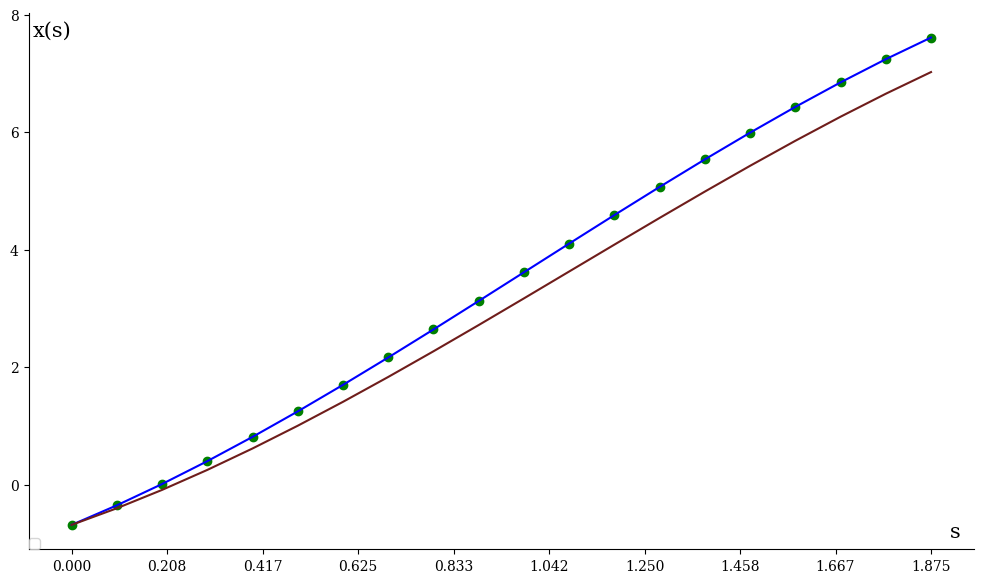

In [ ]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))
    
    # s_values = np.arange(a_, b_ + h_step, h_step)
    s_values = np.arange(a_ + h_step, b_+ h_step, h_step)

    # numerical
    x_values = x_numeric

    print(s_values)
    print(x_values)

    ax.scatter(s_values, 
               x_values, 
               color='green')
    ax.plot(s_values, 
            x_values, 
            color='blue',
            linestyle='-', 
            linewidth=1.5)


    # symbolic
    x_values = [res.rhs.subs(s, val).evalf() for val in s_values]
    ax.plot(s_values, 
            x_values, 
            color=RED,
            linestyle='-', 
            linewidth=1.5)

    
    decorate_plot(ax, np.linspace(a_, b_, 10), 's', 'x(s)', loc=(0, 0))

    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('plot')

In [ ]:
# s_values = np.arange(a_, b_ + h_step, h_step)
s_values  = np.arange(a_ + h_step, b_+ h_step, h_step)
x_values  = np.array([res.rhs.subs(s, val).evalf() for val in s_values])
error     = np.abs(x_values - x_numeric)

str_: str = f'$\\begin{{equation}}'

results = [s_values, x_values, x_numeric, error]
for result in results:
    str_ += sp.latex(sp.Matrix(result)) + '\\qquad'

str_ += f'\\end{{equation}}$'

display(Math(f'$\\begin{{equation}} \\text{{s}} \\qquad \\text{{Аналитический x(s)}} \\qquad \\text{{Численный x(s)}} \\qquad \\text{{Абсолютная погрешность}} \\end{{equation}}$'))
display(Math(str_))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1851]:
maxError = max(error)
display(Math(f'$\\begin{{equation}} \\text{{max }} \\Delta: {maxError} \\end{{equation}}$'))

<IPython.core.display.Math object>